### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [773]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [774]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [775]:
initial_data.shape[0] == processed_data.shape[0]

True

In [776]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [777]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [778]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [779]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

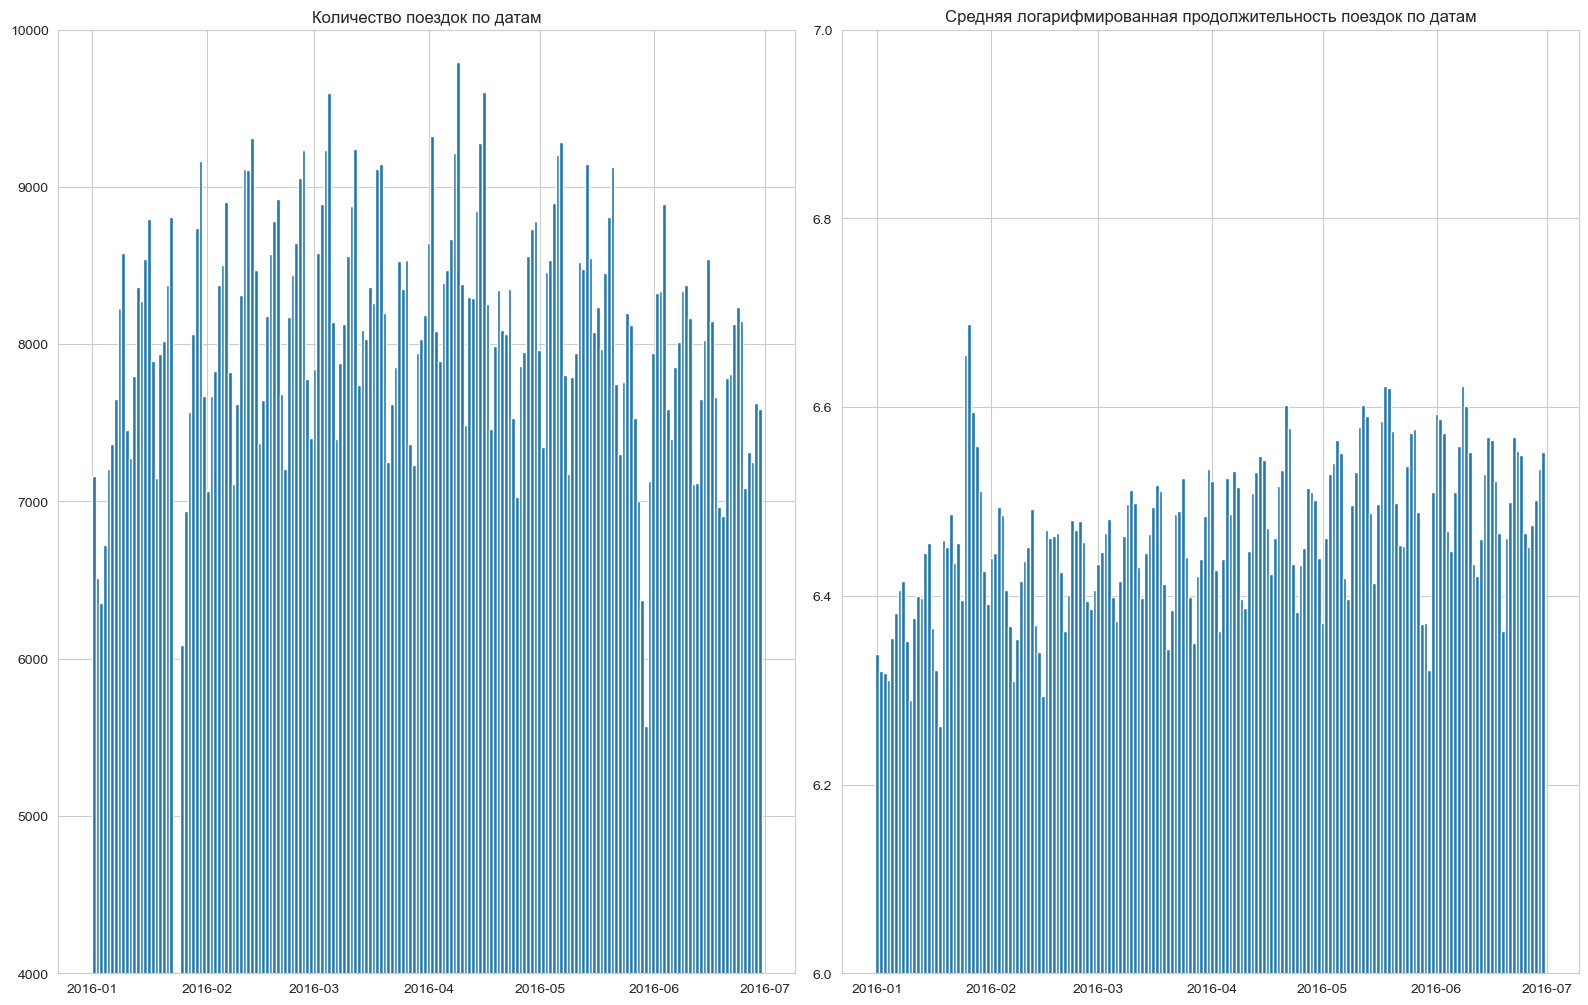

In [780]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


In [781]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


In [782]:
df1 = processed_data.groupby(['day_of_week'], as_index=False).agg( count=('log_trip_duration','count'), mean=('log_trip_duration','mean') )
df1.head()

,day_of_week,count,mean
0,0,187418,6.426564
1,1,202749,6.491582
2,2,210136,6.513662
3,3,218574,6.528534
4,4,223533,6.499936


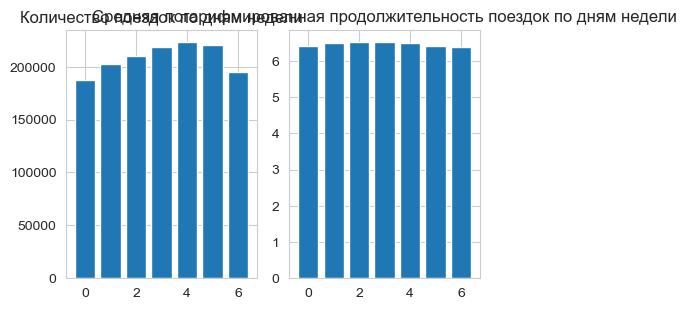

In [783]:
### Your code is here

fig = plt.figure()

fig.set_size_inches(5, 3)
ax_1 = fig.add_subplot(1, 2, 1)
plt.bar(df1['day_of_week'], df1['count'])


ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(df1['day_of_week'], df1['mean'])


fig.tight_layout()

ax_1.set(title = 'Количество поездок по дням недели')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по дням недели')

plt.show()


In [784]:
df2 = processed_data.groupby(['hour'], as_index=False).agg( count=('log_trip_duration','count'), mean=('log_trip_duration','mean') )
df2.head()

,hour,count,mean
0,0,53248,6.422417
1,1,38571,6.373789
2,2,27972,6.325211
3,3,20895,6.318661
4,4,15792,6.328824


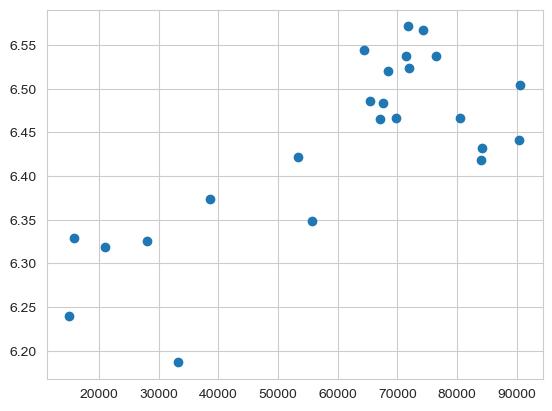

In [785]:
plt.scatter(df2['count'],df2['mean'])

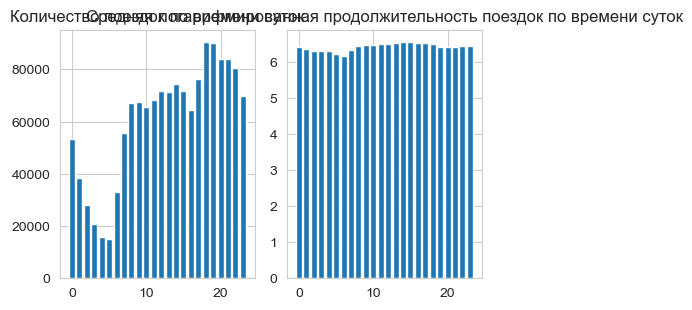

In [786]:
### Your code is here

fig = plt.figure()

fig.set_size_inches(5, 3)
ax_1 = fig.add_subplot(1, 2, 1)
plt.bar(df2['hour'], df2['count'])


ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(df2['hour'], df2['mean'])


fig.tight_layout()

ax_1.set(title = 'Количество поездок по времени суток')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по времени суток')

plt.show()

In [787]:
df4 = processed_data.groupby(['month'], as_index=False).agg( count=('log_trip_duration','count'), mean=('log_trip_duration','mean') )
df4

,month,count,mean
0,1,229707,6.420083
1,2,238300,6.422723
2,3,256189,6.451176
3,4,251645,6.481254
4,5,248487,6.507097
5,6,234316,6.517361


In [788]:
for i in range (1,7):
    df_temp = processed_data[processed_data['month'] == i]


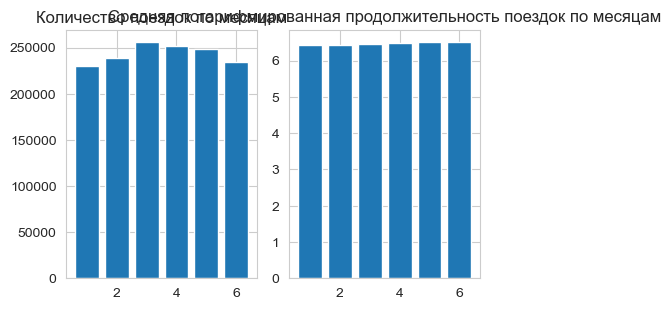

In [789]:
### Your code is here

fig = plt.figure()

fig.set_size_inches(5, 3)
ax_1 = fig.add_subplot(1, 2, 1)
plt.bar(df4['month'], df4['count'])

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(df4['month'], df4['mean'])


fig.tight_layout()

ax_1.set(title = 'Количество поездок по месяцам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по месяцам')

plt.show()

In [790]:
df3 = processed_data.groupby(['day_of_week','hour'], as_index=False).agg( count=('log_trip_duration','count'), mean=('log_trip_duration','mean') )
df3.head()

,day_of_week,hour,count,mean
0,0,0,4299,6.328173
1,0,1,2578,6.289221
2,0,2,1658,6.260257
3,0,3,1226,6.321038
4,0,4,1351,6.325626


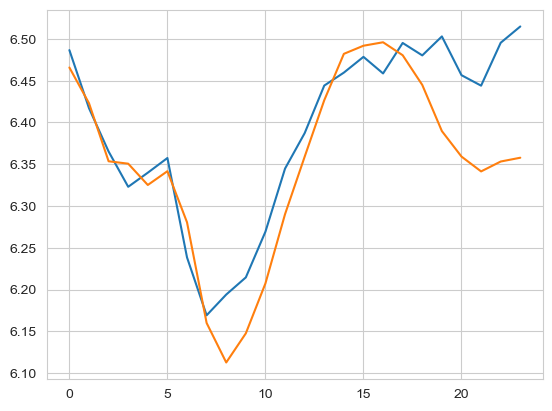

In [791]:
for i in range(5,7):
    pl3 = df3[df3['day_of_week'] == i]
    plt.plot(pl3['hour'], pl3['mean'])

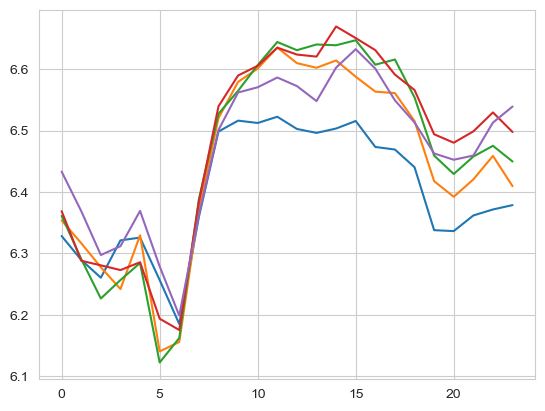

In [792]:
for i in range(5):
    pl3 = df3[df3['day_of_week'] == i]
    plt.plot(pl3['hour'], pl3['mean'])

<AxesSubplot: xlabel='day_of_week', ylabel='count'>

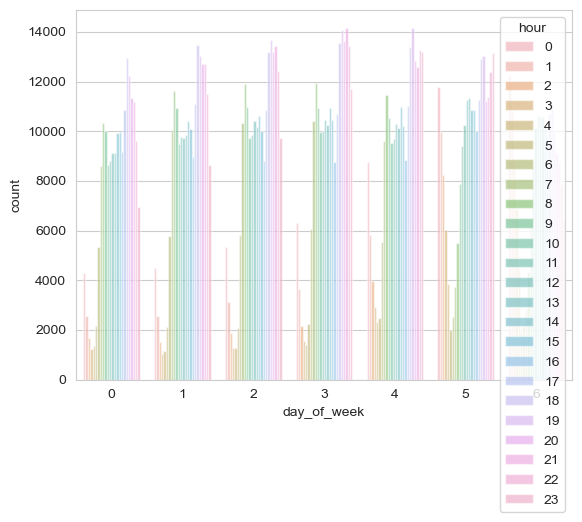

In [793]:
pl_1 = df3
sns.set_style('whitegrid')
sns.barplot(x='day_of_week', y='count',
    alpha=.5, hue='hour', data=pl_1)

<AxesSubplot: xlabel='day_of_week', ylabel='mean'>

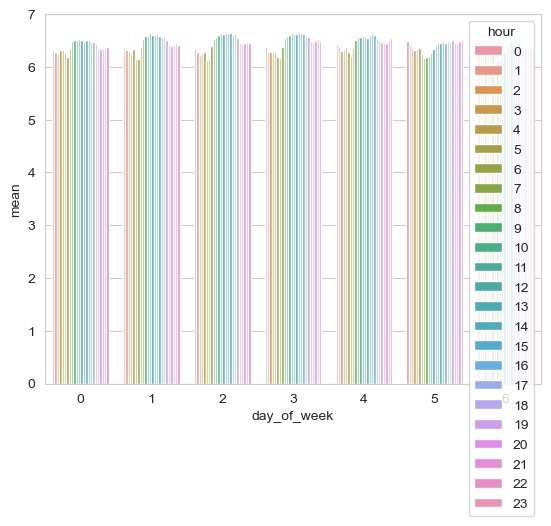

In [794]:
pl_2 = df3
sns.set_style('whitegrid')
sns.barplot(x='day_of_week', y='mean', hue='hour', data=pl_2)

In [795]:
df5 = processed_data.groupby(['month','day_of_week'], as_index=False).agg( count=('log_trip_duration','count'), mean=('log_trip_duration','mean') )
df5.head()

,month,day_of_week,count,mean
0,1,0,27231,6.392290
1,1,1,29873,6.471848
2,1,2,31314,6.455752
3,1,3,32367,6.474975
4,1,4,41470,6.434880


<AxesSubplot: xlabel='month', ylabel='count'>

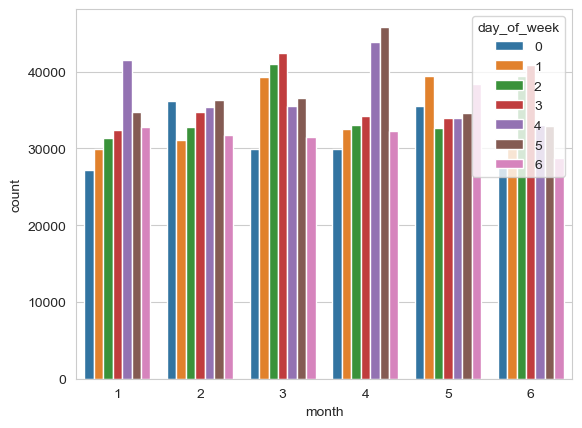

In [796]:
pl_3 = df5
sns.set_style('whitegrid')
sns.barplot(x='month', y='count', hue='day_of_week', data=pl_3)

In [797]:
processed_data.groupby('date').agg({'log_trip_duration':'sum'}).sort_values(by=['log_trip_duration'])

,log_trip_duration
date,
2016-01-23,10639.487452
2016-01-24,21634.585756
2016-05-30,35208.164405
2016-01-03,40138.161151
2016-01-25,40489.695623
...,...
2016-05-06,60281.998744
2016-04-15,60704.776735
2016-03-05,61408.755586


Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [798]:
### Создадим первый бинарный признак
### Your code is here
from datetime import date

processed_data['anomaly'] = np.where(processed_data['date'] == date(2016,1,23), 1, 0)
processed_data['anomaly'].unique()


array([0, 1])

In [799]:
### Создадим второй бинарный признак
### Your code is here

sec = processed_data.groupby(['day_of_week', 'hour'], as_index=False)['log_trip_duration'].mean().sort_values(by='log_trip_duration', ascending=False).head(10)

In [800]:
sec

,day_of_week,hour,log_trip_duration
86,3,14,6.669526
87,3,15,6.650622
63,2,15,6.647091
59,2,11,6.644226
61,2,13,6.640205
62,2,14,6.638930
35,1,11,6.635141
83,3,11,6.635055
111,4,15,6.632537
88,3,16,6.630965


In [801]:
prov = {}
for i in sec['day_of_week'].unique():
    prov[i] = sec.loc[sec['day_of_week'] == i]['hour'].values.tolist()
prov

{3: [14, 15, 11, 16], 2: [15, 11, 13, 14], 1: [11], 4: [15]}

In [802]:
def izm(df, dict_p):
    day = df['day_of_week']
    hour = df['hour']
    if day in dict_p and hour in dict_p[day]:
        return 1
    else:
        return 0

In [803]:
processed_data['traffic_jam'] = processed_data.apply(lambda x: izm(x, prov), axis=1)

In [804]:
processed_data['traffic_jam'].unique()

array([0, 1])

Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [805]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [806]:
### Делаем OneHotEncoding и конкатим с processed_data
from sklearn.preprocessing import OneHotEncoder

for col in ['day_of_week', 'hour', 'month']:
    
    ### Your code is here
    processed_data = processed_data.join(pd.get_dummies(processed_data[col], prefix=col, drop_first=True))
    processed_data = processed_data.drop(columns=[col])


In [807]:
list(processed_data.columns)

['vendor_id',
 'passenger_count',
 'store_and_fwd_flag',
 'distance_km',
 'log_trip_duration',
 'anomaly',
 'traffic_jam',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6']

In [808]:
processed_data.shape

(1458644, 41)

In [809]:
processed_data.head(5).to_csv('ans1.csv',sep=',')

Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [810]:
### Your code is here

np.corrcoef(processed_data['distance_km'].values,processed_data['passenger_count'].values)


array([[1.        , 0.01659589],
       [0.01659589, 1.        ]])

In [811]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id,,,,,,,,,,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
id2377394,0,930.399753,0,1.807119,6.498282,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
id3858529,1,930.399753,0,6.392080,7.661527,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
id3504673,1,930.399753,0,1.487155,6.063785,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
id2181028,1,930.399753,0,1.189925,6.077642,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [812]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [813]:
X = processed_data.drop(columns=['log_trip_duration'])
y = processed_data['log_trip_duration']

In [825]:
lr = LinearRegression()
sfs = SequentialFeatureSelector(lr, n_features_to_select=5)
sfs.fit(X, y)
SequentialFeatureSelector(estimator=LinearRegression(),
                          n_features_to_select=5)


SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=5)

In [826]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here

sfs.get_feature_names_out()

array(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'],
      dtype=object)

In [833]:
X[sfs.get_feature_names_out()]

,distance_km,traffic_jam,day_of_week_6,hour_5,hour_6
id,,,,,
id2875421,1.500479,0,0,0,0
id2377394,1.807119,0,1,0,0
id3858529,6.392080,1,0,0,0
id3504673,1.487155,0,0,0,0
id2181028,1.189925,0,0,0,0
...,...,...,...,...,...
id2376096,1.226296,0,0,0,0
id1049543,6.056935,0,1,0,0
id2304944,7.832952,0,0,0,1


In [839]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here
model = LinearRegression()

model.fit(X[sfs.get_feature_names_out()], y)


LinearRegression()

In [840]:
print(np.mean((y-model.predict(X[sfs.get_feature_names_out()]))**2))

0.4154000234078254
